# **Experiment 1 on BERT**

Note: Please refer to README.md file in order to see the description for each experiment in detail.

# **Using SQUAD dataset to see attention pattern in BERT**

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
ds = load_dataset("rajpurkar/squad")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [ ]:
sample = ds["validation"][0]
print("Title:", sample["title"])
print("Context:", sample["context"])
print("Question:", sample["question"])
print("Answers:", sample["answers"])


Title: Super_Bowl_50
Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.
Question: Which NFL team represented the AFC at Super Bowl 50?
Answers: {'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos'], 'answer_start': [177, 177, 177]}


In [ ]:
from transformers import AutoModel, AutoTokenizer
model_used = "bert-base-uncased"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model = AutoModel.from_pretrained(model_used, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_used)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
attentions_list = []
tokens_list = []

for i in range(51):
    data = ds["validation"][i]
    question = data["question"]
    context = data["context"]
    inputs = tokenizer(question, context, return_tensors="pt", truncation=True)
    outputs = model(**inputs, output_attentions=True)
    attentions_list.append(outputs.attentions)
    tokens_list.append(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [ ]:
print("Sample of how input looks after tokenizing", inputs)

Sample of how input looks after tokenizing {'input_ids': tensor([[  101,  2040,  2106,  7573,  3786,  1999,  1996,  2325, 10511,  2528,
          2208,  1029,   102,  1996, 12915,  2736,  1996,  3180,  2161,  2007,
          1037,  2321,  1516,  1015,  2501,  1010,  1998,  9074, 11503,  8446,
          2001,  2315,  1996,  5088,  2087,  7070,  2447,  1006, 12041,  1007,
          1012,  2027,  3249,  1996,  5334,  9310,  4749,  1516,  2321,  1999,
          1996, 22309,  2528,  2208,  1998,  3935,  2000,  2037,  2117,  3565,
          4605,  3311,  2144,  1996,  6329,  2001,  2631,  1999,  2786,  1012,
          1996, 14169,  2736,  1996,  3180,  2161,  2007,  1037,  2260,  1516,
          1018,  2501,  1010,  1998,  6380,  1996,  2047,  2563, 11579,  1037,
          3382,  2000,  6985,  2037,  2516,  2013,  3565,  4605, 28712,  7646,
          2011,  6324,  2068,  2322,  1516,  2324,  1999,  1996, 10511,  2528,
          2208,  1012,  2027,  2587,  1996, 11579,  1010,  5759, 11666,  1

In [ ]:
print(attentions_list[0])


(tensor([[[[8.0601e-03, 1.0655e-02, 3.1770e-03,  ..., 5.5680e-03,
           7.1443e-03, 1.9505e-02],
          [1.0065e-01, 2.7279e-02, 5.3486e-02,  ..., 7.7969e-04,
           8.2782e-04, 1.2782e-03],
          [4.2717e-02, 3.0571e-02, 1.4683e-01,  ..., 1.8053e-04,
           4.7014e-04, 4.9521e-04],
          ...,
          [2.4534e-03, 1.0132e-04, 9.0299e-05,  ..., 1.4859e-02,
           7.2897e-03, 6.5047e-03],
          [1.9376e-03, 8.1361e-05, 3.0235e-05,  ..., 8.2699e-03,
           1.5562e-02, 9.5545e-03],
          [2.0193e-03, 6.2857e-05, 2.1124e-05,  ..., 1.1522e-02,
           1.1161e-02, 1.5447e-02]],

         [[3.4244e-02, 1.1100e-03, 1.7414e-04,  ..., 5.5272e-04,
           1.7044e-03, 3.3131e-04],
          [3.0691e-03, 2.9931e-02, 1.4726e-02,  ..., 1.0247e-03,
           1.3851e-03, 2.5691e-03],
          [2.6935e-02, 6.6227e-03, 2.0879e-02,  ..., 3.2676e-03,
           6.4516e-04, 2.8469e-03],
          ...,
          [7.8253e-04, 2.7607e-04, 5.3428e-03,  ..., 2.804

In [ ]:
print(outputs.keys())

odict_keys(['last_hidden_state', 'pooler_output', 'attentions'])


In [ ]:
if 'attentions' in outputs:
    print(type(outputs.attentions))
    print(len(outputs.attentions))
    print(outputs.attentions[0].shape)

<class 'tuple'>
12
torch.Size([1, 12, 139, 139])


# **Visualising the attention using heatmap**




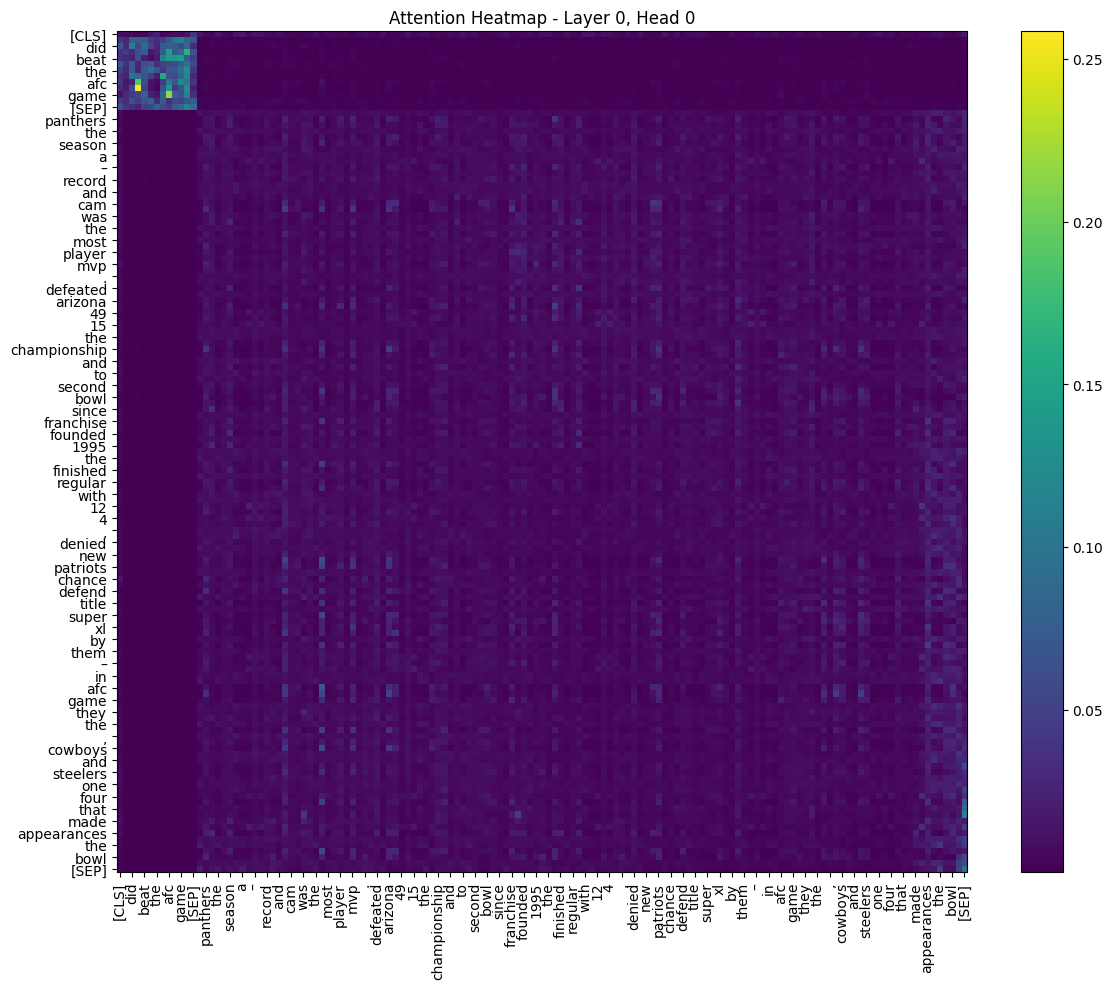

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_index = 50
sample_attention = attentions_list[sample_index]
sample_tokens = tokens_list[sample_index]

layer_num = 0  # First layer (0-indexed)
head_num = 0   # First attention head (0-indexed)

# Extract attention weights for the first layer and head
attention_weights = sample_attention[layer_num][0, head_num].cpu().detach().numpy()

# Plot the attention heatmap
plt.figure(figsize=(12, 10))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.colorbar()
token_indices = np.arange(len(sample_tokens))
step = 2  # Show every 5th token
plt.xticks(token_indices[::step], sample_tokens[::step], rotation=90)
plt.yticks(token_indices[::step], sample_tokens[::step])
plt.title(f"Attention Heatmap - Layer {layer_num}, Head {head_num}")
plt.tight_layout()
plt.show()


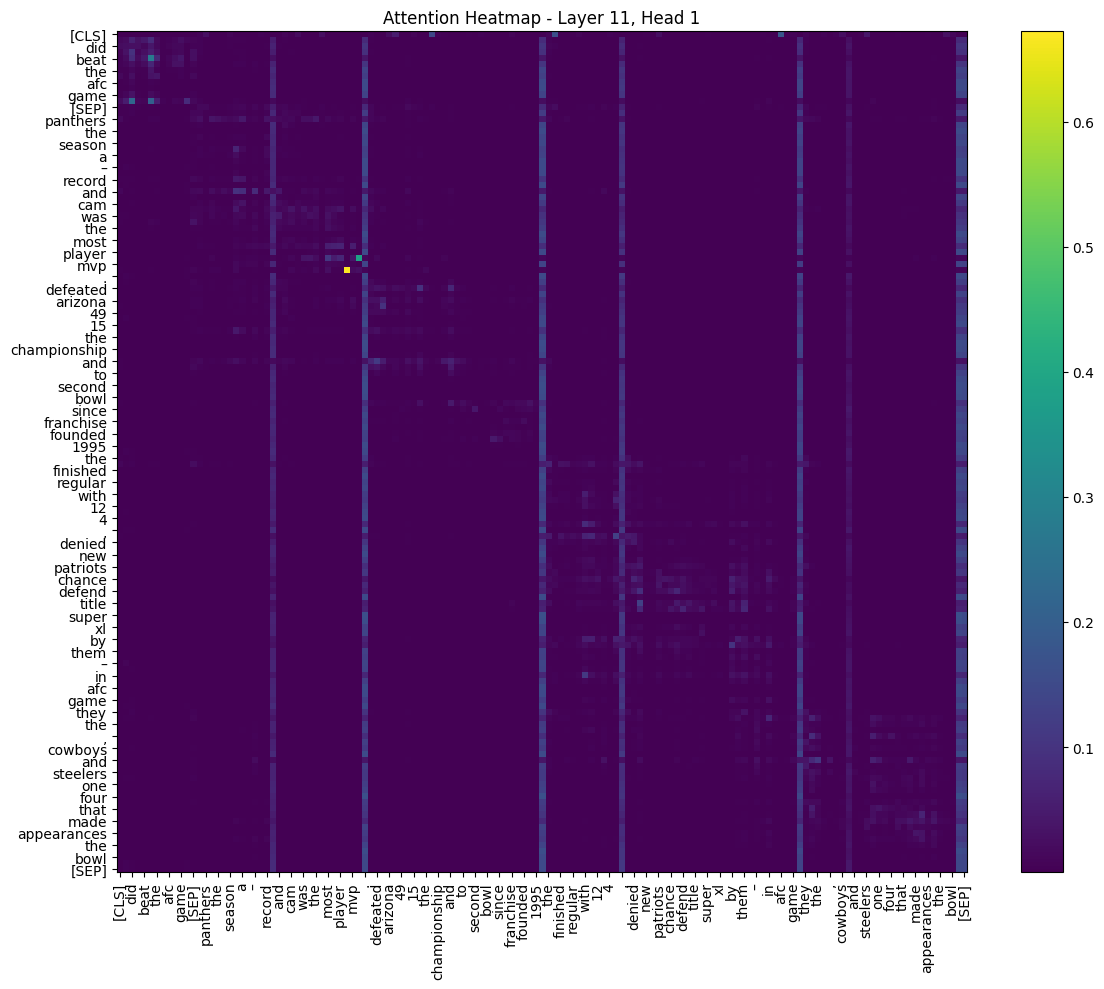

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_index = 50
sample_attention = attentions_list[sample_index]
sample_tokens = tokens_list[sample_index]

layer_num = 11 # Twelfth layer (0-indexed)
head_num = 1   # Second attention head (0-indexed)

# Extract attention weights for the first layer and head
attention_weights = sample_attention[layer_num][0, head_num].cpu().detach().numpy()

# Plot the attention heatmap
plt.figure(figsize=(12, 10))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.colorbar()
token_indices = np.arange(len(sample_tokens))
step = 2  # Show every 5th token
plt.xticks(token_indices[::step], sample_tokens[::step], rotation=90)
plt.yticks(token_indices[::step], sample_tokens[::step])
plt.title(f"Attention Heatmap - Layer {layer_num}, Head {head_num}")
plt.tight_layout()
plt.show()

# **Aggregate attention across all heads in the specified layer**

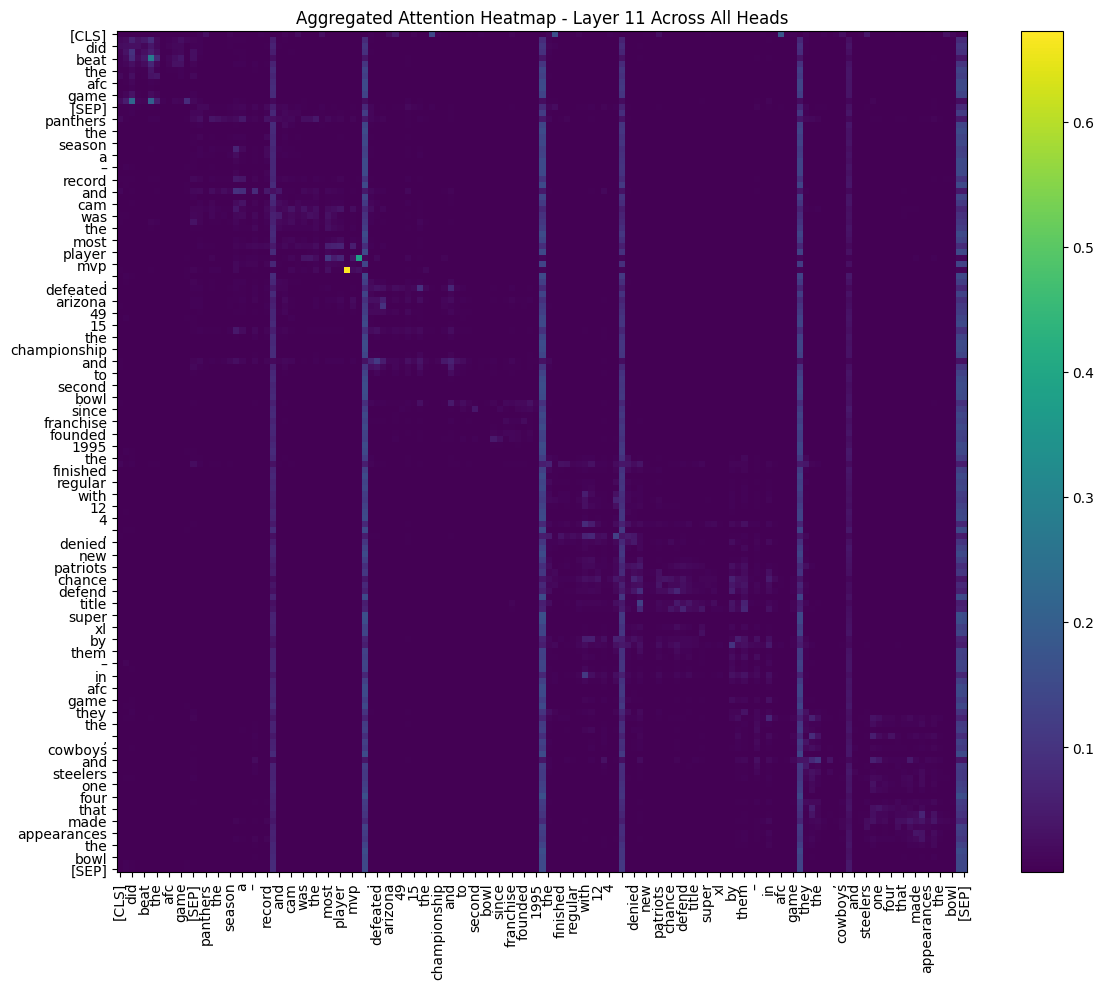

In [ ]:
layer_attention = sample_attention[layer_num]
layer_attention = layer_attention.cpu().detach().numpy()

if layer_attention.ndim == 4:
    layer_attention = layer_attention.mean(axis=1)
    layer_attention = layer_attention.squeeze(0)

if layer_attention.ndim == 3:
    layer_attention = layer_attention.reshape(layer_attention.shape[1], layer_attention.shape[2])


# Plot the aggregated attention heatmap
plt.figure(figsize=(12, 10))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.colorbar()
token_indices = np.arange(len(sample_tokens))
step = 2  # Adjust step size to control the number of tokens displayed
plt.xticks(token_indices[::step], sample_tokens[::step], rotation=90)
plt.yticks(token_indices[::step], sample_tokens[::step])
plt.title(f"Aggregated Attention Heatmap - Layer {layer_num} Across All Heads")
plt.tight_layout()
plt.show()

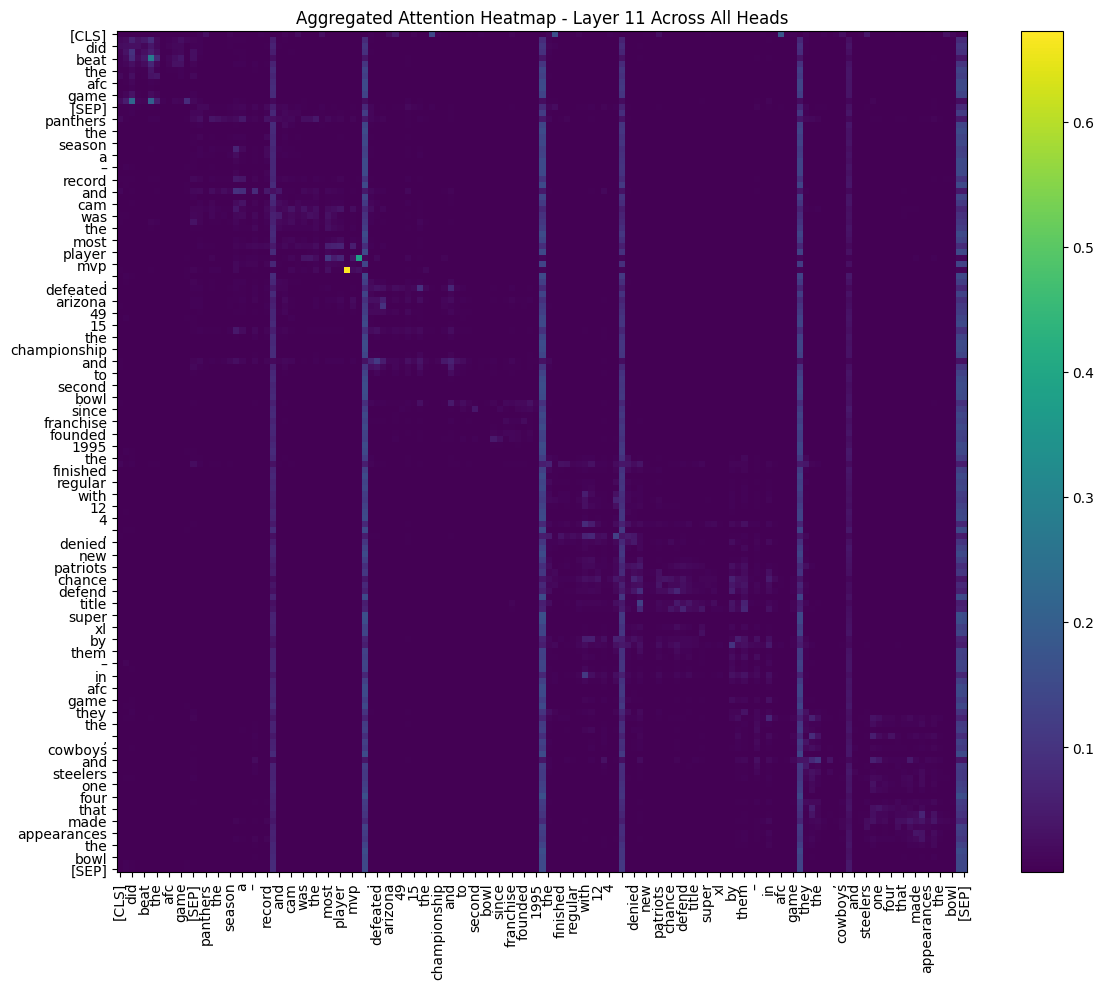

In [ ]:
layer_num = 11
layer_attention = sample_attention[layer_num]
layer_attention = layer_attention.cpu().detach().numpy()

if layer_attention.ndim == 4:
    layer_attention = layer_attention.mean(axis=1)
    layer_attention = layer_attention.squeeze(0)

if layer_attention.ndim == 3:
    layer_attention = layer_attention.reshape(layer_attention.shape[1], layer_attention.shape[2])


# Plot the aggregated attention heatmap
plt.figure(figsize=(12, 10))
plt.imshow(attention_weights, cmap='viridis', aspect='auto')
plt.colorbar()
token_indices = np.arange(len(sample_tokens))
step = 2  # Adjust step size to control the number of tokens displayed
plt.xticks(token_indices[::step], sample_tokens[::step], rotation=90)
plt.yticks(token_indices[::step], sample_tokens[::step])
plt.title(f"Aggregated Attention Heatmap - Layer {layer_num} Across All Heads")
plt.tight_layout()
plt.show()

## Attention paid to specific types of tokens
(b) Identify patterns such as how much attention is paid to specific types of tokens (e.g., nouns, verbs, punctuation).





In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load spaCy model for POS tagging
nlp = spacy.load("en_core_web_sm")

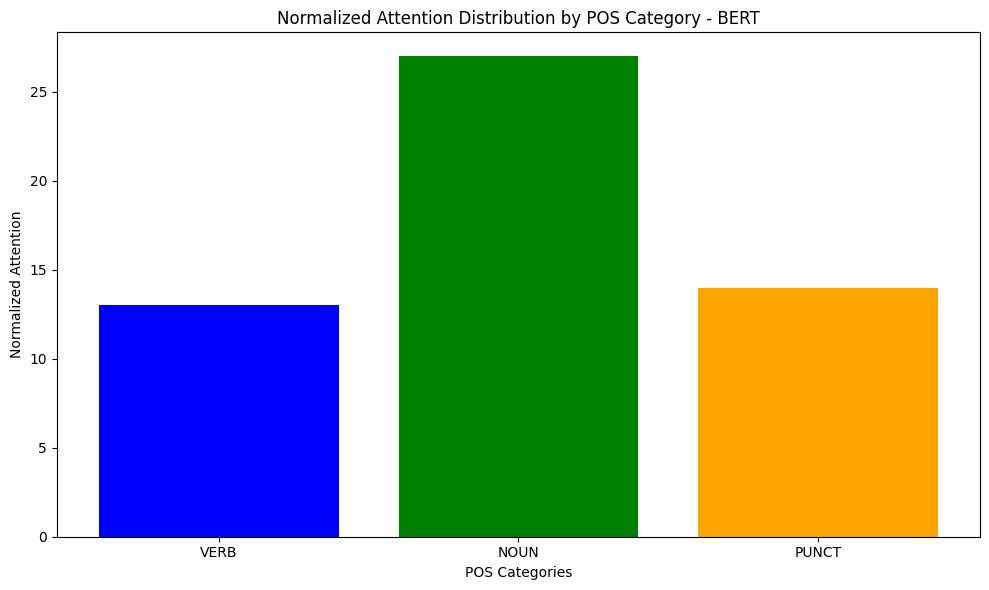

In [ ]:
# Tokenize using spaCy
doc = nlp(" ".join(sample_tokens))
pos_tags = [token.pos_ for token in doc]

# Define POS categories of interest
pos_categories = {"NOUN", "VERB", "PUNCT"}

# Initialize a dictionary to store attention sums per POS category
attention_sums = {category: 0 for category in pos_categories}

# Aggregate attention across all heads for the specified layer
# Shape after aggregation: (seq_length, seq_length)
layer_num = 11
aggregated_attention = sample_attention[layer_num].mean(dim=1).to(torch.float32).cpu().detach().numpy()

# Filter tokens and aggregate attention weights
for i, (token, pos) in enumerate(zip(sample_tokens, pos_tags)):
    if pos in pos_categories:
        # Sum attention weights pointing to this token across all heads (adjust indexing as needed)
        attention_weight = np.sum(aggregated_attention[:, i])  # Summing over all heads
        attention_sums[pos] += attention_weight

# Prepare data for plotting
categories = list(attention_sums.keys())
summed_attention = list(attention_sums.values())

# Normalize the attention sums to the total attention for better comparability
# total_attention = sum(summed_attention)
# normalized_attention = [attn / total_attention for attn in summed_attention]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, summed_attention, color=['blue', 'green', 'orange'])

# Adding labels and title
plt.title("Normalized Attention Distribution by POS Category - BERT")
plt.xlabel("POS Categories")
plt.ylabel("Normalized Attention")
plt.tight_layout()
plt.show()
